# Exercise 5.17: The Gamma function

A commonly occurring function in physics calculations is the gamma function, which is defined by

$$\Gamma(a) = \int_0^\infty x^{a-1}e^{-x}dx.$$ 

There is no closed-form expression for the gamma function, but one can calculate its value for given $a$ by performing the integral above numerically. You have to be careful how you do it, however, if you wish to get an accurate answer.


a) Write a program to make a graph of the value of the integrand $x^{a-1}e^{-x}$ as a function of $x$ from $x=0$ to $x=5$, with three seperate seperate curves for $a=2,3,4$ all on the same axes. You should find that the integrand starts at zero, rises to a maximum, and then decays again for each curve.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from gaussxw import gaussxwab

In [2]:
def f(x, a):
    return x**(a-1)*np.exp(-x)

In [3]:
def gauss_quad(f, start, stop, N, a):
        
    x, w = gaussxwab(N, start, stop)
    I = 0
    for k in range(N):
        I += w[k]*f(x[k], a)
    return I

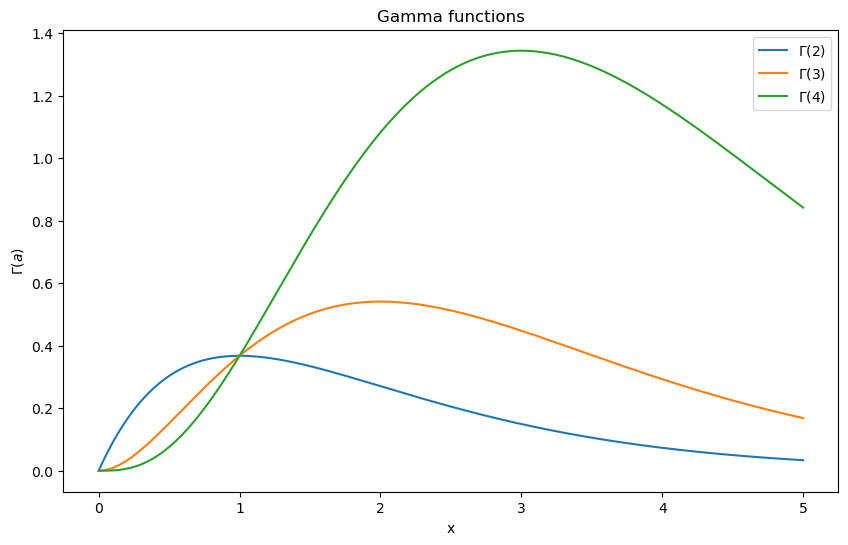

[[0.9595723180054867], [1.7506959610338382], [4.409844508215833]]

In [4]:
x_range = np.linspace(0, 5, 1000)
N = 50
a_range = [2, 3, 4]

Gamma = [[] for _ in range(3)]
plt.figure(figsize=(10,6))
plt.title("Gamma functions")
plt.xlabel("x")
plt.ylabel("$\Gamma(a)$")

for a in a_range:
    y = f(x_range, a)
    Gamma[a-2].append(gauss_quad(f, x_range[0], x_range[-1], N, a))
    plt.plot(x_range, y, label=f"$\Gamma({a})$")

plt.legend()
plt.show()
Gamma

b)  Show analytically that the maximum falls at $x=a-1$.

Let's start with the gamma function

$$\Gamma(a) = \int_0^\infty x^{a-1}e^{-x}dx.$$ 

We know that maxima occur when the derivative is zero

So let's take a derivative of the function

$$ \frac{\text{d}}{\text{d}x} x^{a-1}e^{-x} = (a-1)x^{a-2}e^{-x} -x^{a-1}e^{-x} = 0 $$

$$ e^{-x}x^{a-2}(a-1-x) = 0 $$

For the three terms we know that 
- $e^{-x}$ only approaches zero as $x\rightarrow \infty$
- $x^{a-2}$ is zero if $x=0$
- $(a-1-x)$ is zero if $x=a-1$

So our third term shows that the maximum occurs at $x=a-1$

c) Most of the area under the integrand falls near the maximum, so to get an accurate value of the gamma function we need to do a good job of this part of the integral. We can change the integral from 0 to $\infty$ to one over a finite range from $0$ to $1$ rusing the change of variables in Eq. (5.67), but this tends to squash the peak towards tehe edge of the [0,1] range and does a poor job of evaluating the integral accurately. We can do a better job by making a different change of variables that puts the peak in the middle of hte integration range, around $\frac{1}{2}$. We will use the change of variables given in Eq. (5.69), which we repeat here for convenience:

$$ z= \frac{x}{c+x} $$

For what value of $x$ does this change of variables give $z=\frac{1}{2}$? Hence what is the approriate choice of the parameter $c$ that puts the peak of the integrand for the gamma function at $z=\frac{1}{2}$?

Let $x=c$ then

$$ z=\frac{x}{c+x} = \frac{c}{2c} = \frac{1}{2} $$

So we can choose $c=\frac{1}{2}$

d) Before we can calculate the gamma function, there is another detail we need to attend to. The integrand $x^{a-1}e^{-x}$ can be difficult to evaluate because the factor $x^{a-1}$ can become very large  and the factor $e^{-x}$ very small, causing numerical overflow or underflow, or both, for some values of x. Write $x^{a-1}=e^{(a-1)ln(x)}$ to derive an alternative expression for the integrand that does not suffer from these problems (or at least not so much). Explain why your new expression is better than the old one.

$$ x^{a-1}e^{-x} = e^{(a-1)ln(x)}e^{-x} $$

$$ x^{a-1}e^{-x} = e^{(a-1)ln(x)-x}$$

This expression will either be very large or very small so will only have one kind of rounding error instead of twice.

In [5]:
def gamma_adjusted(x, a):
    return np.exp(-x+(a-1)*np.log(x))

C:\Users\jonat\AppData\Local\Temp\ipykernel_31364\3102557887.py:2: RuntimeWarning: divide by zero encountered in log
  return np.exp(-x+(a-1)*np.log(x))


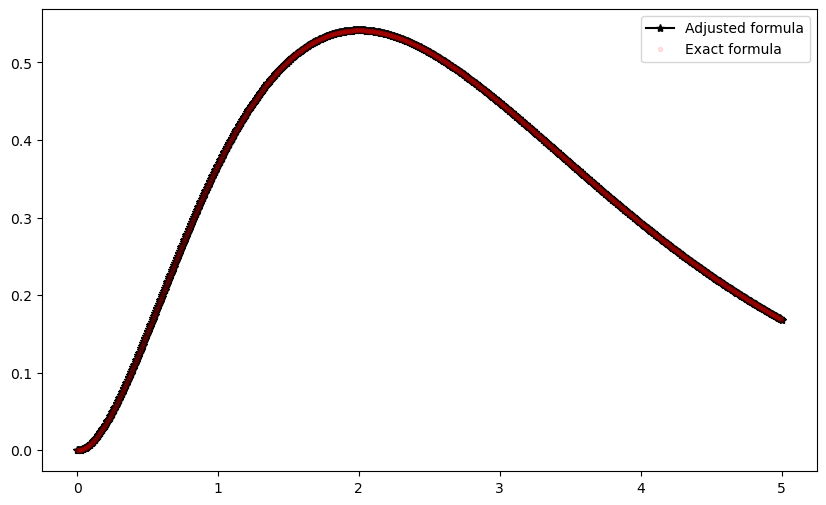

In [6]:
plt.figure(figsize=(10,6))
plt.plot(np.linspace(0,5, 1000), gamma_adjusted(np.linspace(0,5, 1000), 3), 'k-*', label="Adjusted formula")
plt.plot(np.linspace(0,5, 1000), f(np.linspace(0,5, 1000), 3), 'r.', alpha=0.1, label="Exact formula")
plt.legend()
plt.show()

In [11]:
# our solution from part d agrees with our earlier solution so let's implement the substitution of variables

def gamma_adjusted_substitute(z, a):
    c = 1/2
    
    # don't forget the dz/dx coeff (c+(z*c)/(1-z))**2/c
    return np.exp(-(z*c)/(1-z)+(a-1)*np.log((z*c)/(1-z)))*(c+(z*c)/(1-z))**2/c

C:\Users\jonat\AppData\Local\Temp\ipykernel_31364\1338864335.py:7: RuntimeWarning: divide by zero encountered in divide
  return np.exp(-(z*c)/(1-z)+(a-1)*np.log((z*c)/(1-z)))*(c+(z*c)/(1-z))**2/c
C:\Users\jonat\AppData\Local\Temp\ipykernel_31364\1338864335.py:7: RuntimeWarning: divide by zero encountered in log
  return np.exp(-(z*c)/(1-z)+(a-1)*np.log((z*c)/(1-z)))*(c+(z*c)/(1-z))**2/c
C:\Users\jonat\AppData\Local\Temp\ipykernel_31364\1338864335.py:7: RuntimeWarning: invalid value encountered in add
  return np.exp(-(z*c)/(1-z)+(a-1)*np.log((z*c)/(1-z)))*(c+(z*c)/(1-z))**2/c


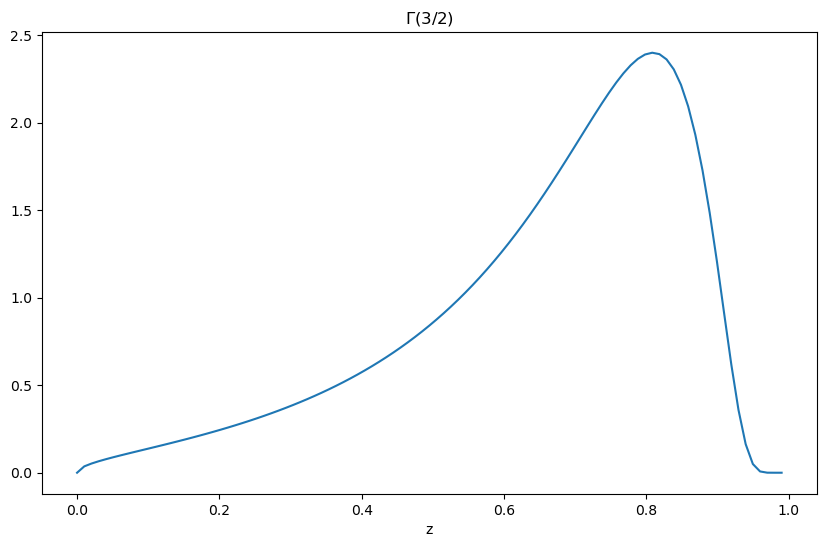

In [12]:
z = np.linspace(0, 1, 100)
a = 3/2

gamma = gamma_adjusted_substitute(z, a)

plt.figure(figsize=(10,6))
plt.title("$\Gamma(3/2)$")
plt.plot(z, gamma)
plt.xlabel("z")
plt.show()

We can see that the function is maxed and has its downturn before $z=1$ (i.e. it's not clipped in our interval) so our substitution of variables is working as intended.

Let's now calculate the integrand, to determine the accuracy let's compare with a known value:

$$\Gamma(\frac{3}{2}) = \frac{1}{2}\sqrt{\pi} \simeq 0.886$$

In [13]:
N = 50
A = 3/2

I = gauss_quad(gamma_adjusted_substitute, 0, 1, N, A)
print(round(I,3))

0.886


f) For integer values of $a$ it can be shown that $\Gamma(a)$ is equal to the factorial of $a--1$ Use your Python function to calculate $\Gamma(3)$, $\Gamma(6)$ and $\Gamma(10)$. You should get answers closesly equal to $2!=2,\; 5!=120,\; \text{and}\; 9!=362880$

In [10]:
N = 1000
for a in [2, 6, 10]:
    print(round(gauss_quad(gamma_adjusted_substitute, 0, 1, N, a)))

1
120
362880
